<a href="https://colab.research.google.com/github/NickSneo/Innovaccer_ML/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataurl = "/content/drive/My Drive/innovacer/ml/BreastCancer_Prognostic_v1.xlsx"

In [0]:
df=pd.read_excel(dataurl)

In [16]:
X = df.drop(["ID"], axis=1)
X = X.drop(["perimeter_mean", "area_mean", "Worst_radius", "Worst_area","Worst_perimeter","perimeter_std_dev","area_std_dev","Worst_texture"], axis=1)
X

,Outcome,Time,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,N,31,18.02,27.60,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,N,61,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,N,123,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,R,27,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,N,10,22.52,21.92,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,N,8,15.44,31.18,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,N,12,17.17,29.19,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,R,3,21.42,22.84,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [17]:
x=X["Lymph_Node_Status"].to_list()
x=pd.to_numeric(x, errors='coerce')
X["Lymph_Status"] = pd.DataFrame(x) 
X = X.drop(["Lymph_Node_Status"],axis=1)
X["Lymph_Status"].fillna(0, inplace = True) 
X.head()

,Outcome,Time,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Status
0,N,31,18.02,27.60,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,N,61,17.99,10.38,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,N,116,21.37,17.44,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,N,123,11.42,20.38,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,R,27,20.29,14.34,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [0]:
#l = LabelEncoder()
#y = l.fit_transform(df["Outcome"])
#df

In [18]:
X= X[df['Outcome'] =="R"]
X.head()

,Outcome,Time,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Status
4,R,27,20.29,14.34,0.1003,0.1328,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
5,R,77,12.75,15.29,0.1189,0.1569,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,0.007775,0.02987,0.04561,0.01357,0.01774,0.005114,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
7,R,77,13.71,20.83,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
13,R,36,14.54,27.54,0.1139,0.1595,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,0.005607,0.04240,0.04741,0.01090,0.01857,0.005466,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6.0
15,R,10,16.13,20.68,0.1170,0.2022,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,0.007026,0.02501,0.03188,0.01297,0.01689,0.004142,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1.0


In [19]:
y=X["Time"]
X=X.drop(["Outcome","Time"],axis=1)
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Status
4,20.29,14.34,0.1003,0.1328,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
5,12.75,15.29,0.1189,0.1569,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,0.007775,0.02987,0.04561,0.01357,0.01774,0.005114,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
7,13.71,20.83,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
13,14.54,27.54,0.1139,0.1595,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,0.005607,0.04240,0.04741,0.01090,0.01857,0.005466,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6.0
15,16.13,20.68,0.1170,0.2022,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,0.007026,0.02501,0.03188,0.01297,0.01689,0.004142,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,3.0,1.0


In [22]:
X.shape

(47, 24)

In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor)

In [31]:
from sklearn.preprocessing import MinMaxScaler
# scalinng the data

names = X.columns[0:24]
scaler = MinMaxScaler() 
X_sc = scaler.fit_transform(X.iloc[:,0:24]) 
X_sc = pd.DataFrame(X_sc, columns=names)

X_sc.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Status
0,0.534274,0.000000,0.460971,0.387864,0.511732,0.449228,0.413090,0.353669,0.355420,0.164528,0.948245,0.175617,0.503079,0.605367,0.178589,0.404896,0.425301,0.135854,0.343603,0.280076,0.027424,0.216833,0.322917,0.000000
1,0.027554,0.057057,0.933893,0.530400,0.400570,0.274247,0.612661,0.881698,0.110588,0.148397,0.479298,0.232680,0.364286,0.328652,0.182722,0.404783,0.825301,0.479654,0.735871,0.333546,0.460409,0.778658,0.218750,0.000000
2,0.092070,0.389790,0.933893,0.575349,0.144686,0.167827,0.828326,1.000000,0.240326,0.398328,0.609316,0.237237,0.108990,0.376343,0.116587,0.438403,0.762651,0.397309,0.084184,0.236155,0.348783,0.740402,0.375000,0.370370
3,0.147849,0.792793,0.806763,0.545777,0.391775,0.255128,0.943133,0.845837,0.098860,0.263315,0.205630,0.368613,0.386453,0.188722,0.201782,0.444495,0.791566,0.861102,0.937402,0.335455,0.743530,1.000000,0.583333,0.222222
4,0.254704,0.380781,0.885584,0.798320,0.420973,0.439732,0.793991,0.960841,0.230851,0.279014,0.384751,0.179956,0.195197,0.297207,0.163203,0.295126,0.925301,0.485582,0.497449,0.565245,0.545771,0.728105,0.270833,0.037037


In [0]:
X_train, X_test, y_train, y_test = train_test_split (X_sc, y, test_size = 0.25)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [0]:
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train)

In [90]:
evaluation = pd.DataFrame({'Model': Model,'RMSE': RMSE, 'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,64.996049,-11.101168
1,Ridge Regression,24.387718,-0.478308
2,Lasso Regression,23.248847,-0.200344
3,K Neighbors Regressor,25.776845,-0.459109
4,Decision Tree Regressor,36.759450,-1.951033
5,Random Forest Regressor,24.917590,-0.523891
6,Gradient Boosting Regressor,30.708637,-1.293845
7,Adaboost Regressor,26.710629,-0.567691


In [0]:
clf =RandomForestRegressor(n_estimators=10)
clf=clf.fit(X_train,y_train)

In [92]:
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))
print("Test R^2: ", r2_score(y_test, clf.predict(X_test)))

Test RMSE:  23.419560912479408
Test R^2:  -0.2290966245973325


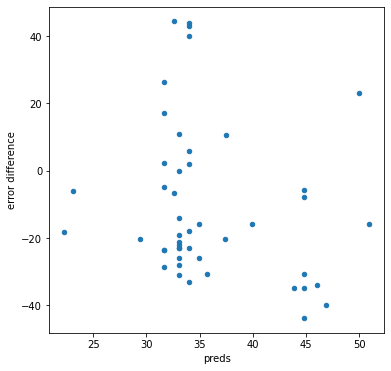

In [93]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":clf.predict(X), "true":y})
preds["error difference"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "error difference",kind = "scatter")

In [94]:
# gradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
#applying this model on test data
clf = GradientBoostingRegressor(learning_rate=0.2/2, max_depth=20,min_samples_split=170, n_estimators=230*2, random_state=1).fit(X_train, y_train)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))
print("Test R^2: ", r2_score(y_test, clf.predict(X_test)))

Test RMSE:  21.79726781855335
Test R^2:  -0.06471322844953642


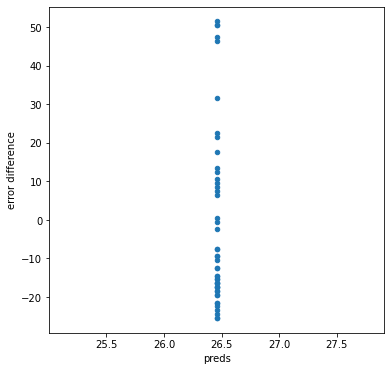

In [96]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":clf.predict(X), "true":y})
preds["error difference"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "error difference",kind = "scatter")